## Final Project Submission

Please fill out:
* Student name: Francis Morales
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Pablo Crespo
* Blog post URL:


# 1. Inspecting and Cleaning the Dataset

### 1.1 Use the dataframe.info(), dataframe.describe(), dataframe.isna() methods and print unique values to get an inital sense of the data. Remove duplicate data.

* ['waterfront', 'view', 'yr_renovated'] --> missing values, need to inspect further
* ['date', 'sqft_basement'] --> are saved as object, might have to convert to a different value_type
* ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'] --> Might be able to convert those variables to categories
* 177 rows with duplicate data were identified and removed from dataset.


In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [53]:
df = pd.read_csv('kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [54]:
#Check for duplicated data
duplicates = df[df.duplicated(subset='id')]
print(len(duplicates))

177


In [55]:
df.drop_duplicates(subset='id', keep='first', inplace=True)
#Check the new number of rows
df['id'].count()

21420

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Check the number of NaNs in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#Examine the unique values in each column to look for placeholders or unlikely data
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n')

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
2592400250    0.000047
6772200055    0.000047
9808700025    0.000047
2595650170    0.000047
2423059067    0.000047
Name: id, dtype: float64 

date 
 6/23/2014     0.006629
6/26/2014     0.006116
6/25/2014     0.006116
7/8/2014      0.005929
4/27/2015     0.005882
3/25/2015     0.005696
7/9/2014      0.005649
4/14/2015     0.005602
6/24/2014     0.005556
10/28/2014    0.005462
Name: date, dtype: float64 

price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
325000.0    0.006863
400000.0    0.006769
375000.0    0.006443
525000.0    0.006116
300000.0    0.006116
Name: price, dtype: float64 

bedrooms 
 3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
Name: bedrooms, dtype: float64 

bathrooms 
 2.50    0.249860
1

### 1.2 Further inspect the data looking for NaNs and placeholder values. Apply data cleaning procedures described in notes below.
   
* ['waterfront']: median = 0 // 99% of the houses with data have ['waterfront'] = 0; therefore, for the NaNs in this variable, I will be assigning ['waterfront'] = 0
* ['view']: median = 0 // 90% of the houses with data have ['view']= 0; therefore, I will be assigning ['view'] = 0 to the NaNs in this variable.
* ['yr_renovated']: median = 0 // 95.7% of the houses with data have ['yr_renovated'] = 0; therefore, for the NaNs in this variable I will be assigning ['yr_renovated'] = 0
* ['yr_renovated']: will transform this variable into a categorical one where ['yr_renovated']=0 if not renovated and ['yr_renovated']=1 if renovated -- this based on 95% of houses have never been renovated and makes more sense to transform to a category
* ['sqft_basement'] has a placeholder "?" representing 2% of the total values. Will calculate the median value of the houses with data and will replace with the calculated median value.
* ['date'] will be converted to the appropriate data type using pandas.to_datetime method


In [56]:
#Handling NaNs
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

#Handling placeholder value in 'sqft_basement'
df2 = df.loc[df['sqft_basement'] != '?'].copy()
df2['sqft_basement'] = pd.to_numeric(df2['sqft_basement'])
median1 = df2['sqft_basement'].median()
df['sqft_basement'].loc[df['sqft_basement'] == '?'] = median1
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

#Converting values != 0 into 1 for 'yr_renovated'
df['yr_renovated'].loc[df['yr_renovated'] != 0] = 1

#Handling data type in date
df['date'] = pd.to_datetime(df['date'])

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,285.904342,1971.092997,0.034547,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,440.008202,29.387141,0.182634,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,1.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


### 1.3 Create dummy variables for categorical data

* Categorical variables should be converted into dummy variables before sticking them in the OLS model
* ['bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'floors', 'waterfront', 'view', 'condition', 'grade'] can certainly be converted to categories after analyzing the unique values contained in each variable. 
        -['bedrooms']: Will create bins [1,3,33] based on quartiles from df.describe() method
        -['bathrooms']: Will create bins [0.5,2.25,8] based on quartiles from df.describe() method
        -['yr_built']: Will create bins [1900,1975,2015] based on quartiles from df.describe() method
        -['floors']: Will create bins [1,1.5,3.5] based on quartiles from df.describe() method
        -['view']: Will create bins [0,2,4] based on quartiles from df.describe() method
        -['condition']: Will create bins [1,3,5] based on quartiles from df.describe() method
        -['grade']: Will create bins [3,7,13] based on quartiles from df.describe() method
        -['yr_renovated','waterfront'] : Will create dummy variables
* Still need to determine if ['date'] can be converted to category columns.





In [34]:
# df['bedrooms'] = df['bedrooms'].astype('category')
# df['bathrooms'] = df['bathrooms'].astype('category')
# df['yr_built'] = df['yr_built'].astype('category')
# df['yr_renovated'] = df['yr_renovated'].astype('category')
# df['floors'] = df['floors'].astype('category')
# df['waterfront'] = df['waterfront'].astype('category')
# df['view'] = df['view'].astype('category')
# df['condition'] = df['condition'].astype('category')
# df['grade'] = df['grade'].astype('category')

In [58]:
# Create dummy variables as described in section 1.2

#Bedrooms
bins = [1, 3, 33]
bins_bed = pd.cut(df['bedrooms'], bins)
bins_bed = bins_bed.cat.as_unordered()
#Bathrooms
bins = [0.5, 2.25, 8]
bins_bath = pd.cut(df['bathrooms'], bins)
bins_bath = bins_bath.cat.as_unordered()
#yr_built
bins = [1900, 1975, 2015]
bins_yr_built = pd.cut(df['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_unordered()
#floors
bins = [1, 1.5, 3.5]
bins_floors = pd.cut(df['floors'], bins)
bins_floors = bins_floors.cat.as_unordered()
#view
bins = [0, 2, 4]
bins_view = pd.cut(df['view'], bins)
bins_view = bins_view.cat.as_unordered()
#condition
bins = [1, 3, 5]
bins_condition = pd.cut(df['condition'], bins)
bins_condition = bins_condition.cat.as_unordered()
#grade
bins = [3, 7, 13]
bins_grade = pd.cut(df['grade'], bins)
bins_grade = bins_grade.cat.as_unordered()

#Converting variables to category columns using "get_dummies" pandas method (as described in section 1.2)
bedrooms_dummies = pd.get_dummies(bins_bed, prefix='bed')
bathrooms_dummies = pd.get_dummies(bins_bath, prefix='bath')
yr_built_dummies = pd.get_dummies(bins_yr_built, prefix='yr_built')
yr_renovated_dummies = pd.get_dummies(df['yr_renovated'], prefix='yr_renovated')
floors_dummies =  pd.get_dummies(bins_floors, prefix='floors')
waterfront_dummies =  pd.get_dummies(df['waterfront'], prefix='waterfr')
view_dummies =  pd.get_dummies(bins_view, prefix='view')
condition_dummies =  pd.get_dummies(bins_condition, prefix='condit')
grade_dummies =  pd.get_dummies(bins_grade, prefix='grade')

df = df.drop(['bedrooms','bathrooms','yr_built', 'yr_renovated','floors', 'waterfront', 'view', 'condition', 'grade'], axis=1)
df = pd.concat([df, bedrooms_dummies, bathrooms_dummies, yr_built_dummies, yr_renovated_dummies, floors_dummies, waterfront_dummies, view_dummies, condition_dummies, grade_dummies], axis=1)
df.head(3)


,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,...,"floors_(1.0, 1.5]","floors_(1.5, 3.5]",waterfr_0.0,waterfr_1.0,"view_(0, 2]","view_(2, 4]","condit_(1, 3]","condit_(3, 5]","grade_(3, 7]","grade_(7, 13]"
0,7129300520,2014-10-13,221900.0,1180,5650,1180,0.0,98178,47.5112,-122.257,...,0,0,1,0,0,0,1,0,1,0
1,6414100192,2014-12-09,538000.0,2570,7242,2170,400.0,98125,47.7210,-122.319,...,0,1,1,0,0,0,1,0,1,0
2,5631500400,2015-02-25,180000.0,770,10000,770,0.0,98028,47.7379,-122.233,...,0,0,1,0,0,0,1,0,1,0


### 1.4 Plot continuous variables to do a final check

* After inspecting continuos data seems like there are no apparent outliers or unlikely data that might suggest for hidden placeholders. We can proceed with further analysis.

In [37]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


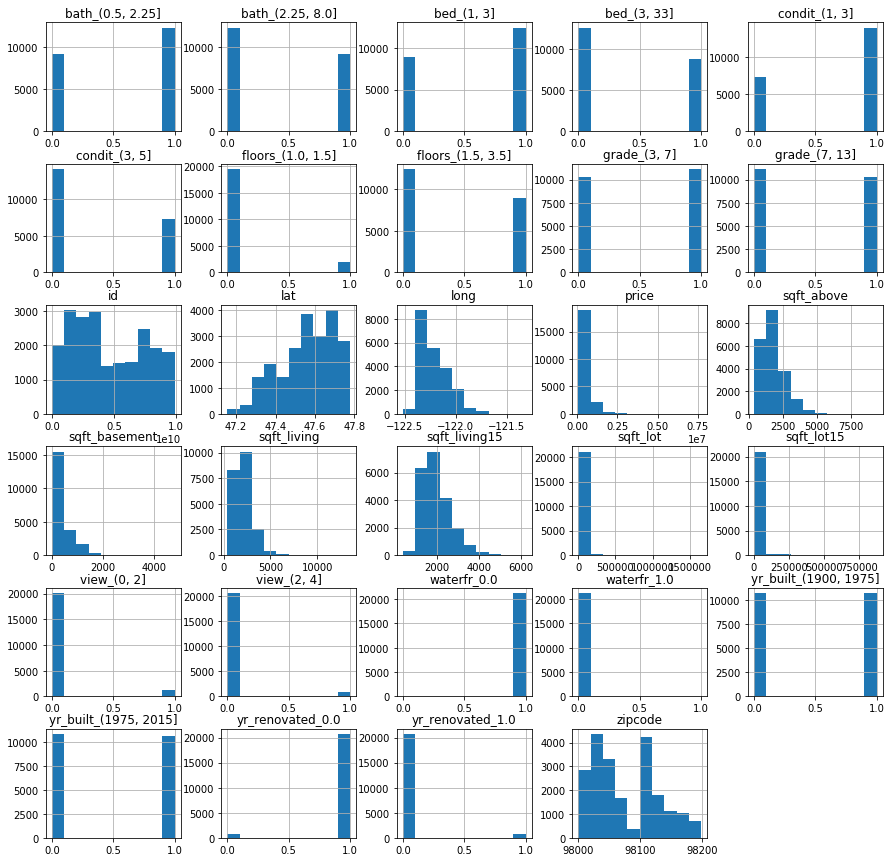

In [88]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

# 2. Split my data into training & testing data

# 3. Check for correlation between variables

### 3.1 Use scatter plots and heatmaps to check correlation 

* Anything higher than abs(0.75) has a high correlation 
* 'sqft_living' and 'sqft_living15' have high correlation (0.8); therefore, one variable needs to be disposed. Will remove 'sqft_living15' as I am more interested on having 'sqft_living' for my posed question.
* 'sqft_living' and 'sqft_above' have high correlation (0.9); therefore, one variable needs to be disposed. Will remove 'sqft_above' as I am interested in keeping a metric for the total living space of the house.
* 'sqft_lot' and 'sqft_lot15' have high correlation (0.7); therefore, one variable needs to be disposed. Will remove 'sqft_lot15' as I dont see much value on keeping this variable for my proposed question.
* I will drop 'id' as this will not help me predict the price
* Since I have a lot of variables resulting from categorical data that are inversely correlated. I am deciding to keep the lower 50% of the data
        - Will keep 'yr_built_(1900, 1975]'
        - Will keep 'yr_renovated_0.0'
        - Will keep 'bed_(1, 3]'
        - Will keep 'bath_(0.5, 2.25]'
        - Will keep 'floors_(1.0, 1.5]'
        - Will keep 'waterfr_0.0'
        - Will keep 'condit_(1, 3]'
        - Will keep 'grade_(3, 7]'


To Drop: ['id', 'sqft_living15', 'sqft_above', 'sqft_lot15', 'yr_built_(1975, 2015]', 'yr_renovated_1.0', 'bed_(3, 33]', 'floors_(1.5, 3.5]', 'bath_(2.25, 8.0]', 'waterfr_1.0', 'condit_(3, 5]', 'grade_(7, 13]']

In [63]:
list(df.columns)

['id',
 'date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'bed_(1, 3]',
 'bed_(3, 33]',
 'bath_(0.5, 2.25]',
 'bath_(2.25, 8.0]',
 'yr_built_(1900, 1975]',
 'yr_built_(1975, 2015]',
 'yr_renovated_0.0',
 'yr_renovated_1.0',
 'floors_(1.0, 1.5]',
 'floors_(1.5, 3.5]',
 'waterfr_0.0',
 'waterfr_1.0',
 'view_(0, 2]',
 'view_(2, 4]',
 'condit_(1, 3]',
 'condit_(3, 5]',
 'grade_(3, 7]',
 'grade_(7, 13]']

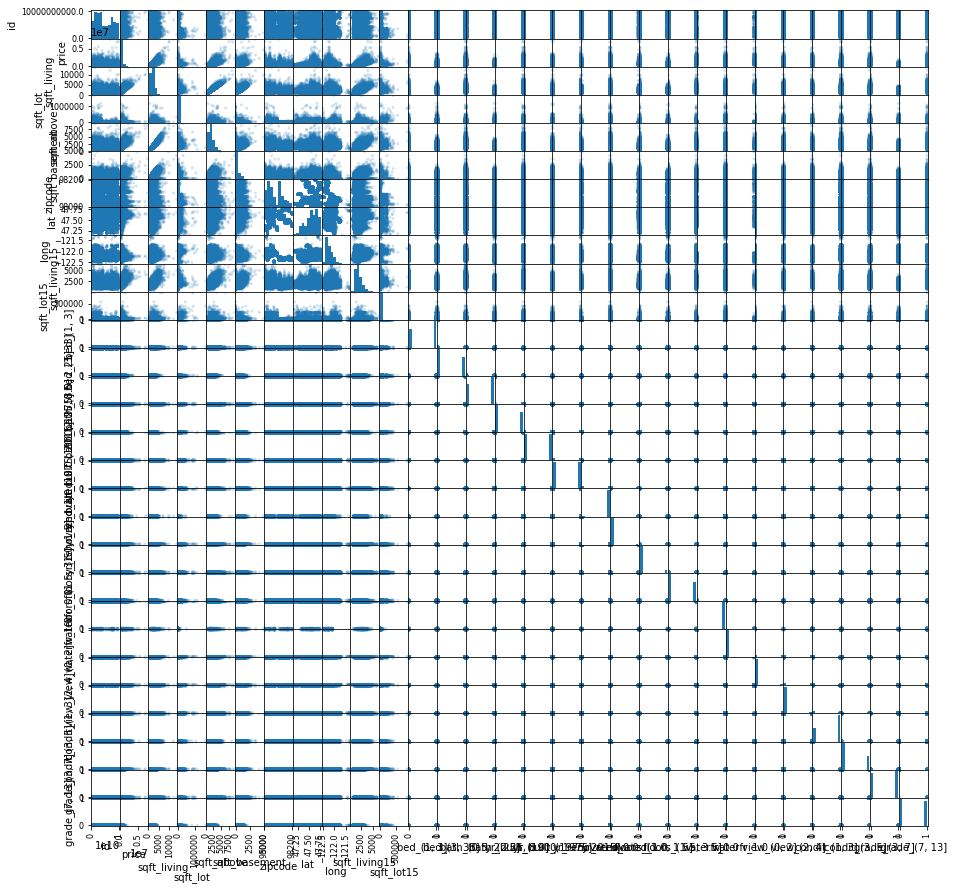

In [60]:
pd.plotting.scatter_matrix(df, figsize=(15,15), diagonal='hist', alpha=0.2)
plt.show()

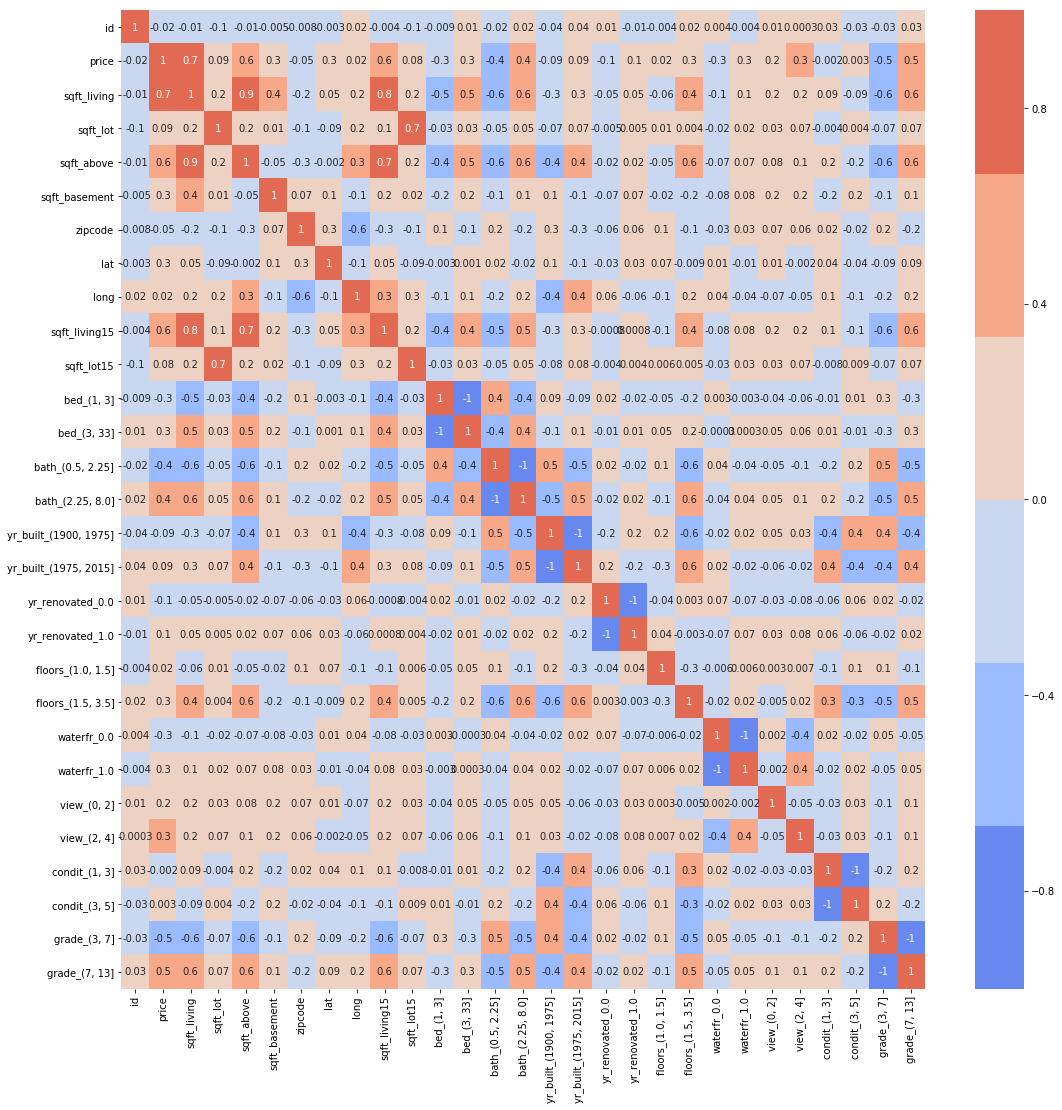

In [62]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

In [80]:
#Drop columns to remove correlation and create plots again
df_new = df.copy()
df_new = df_new.drop(['id', 'sqft_living15', 'sqft_above', 'sqft_lot15', 'yr_built_(1975, 2015]', 'yr_renovated_1.0', 'bed_(3, 33]', 'floors_(1.5, 3.5]', 'bath_(2.25, 8.0]', 'waterfr_1.0', 'condit_(3, 5]', 'grade_(7, 13]'], axis=1)

In [81]:
df_new.head()

,date,price,sqft_living,sqft_lot,sqft_basement,zipcode,lat,long,"bed_(1, 3]","bath_(0.5, 2.25]","yr_built_(1900, 1975]",yr_renovated_0.0,"floors_(1.0, 1.5]",waterfr_0.0,"view_(0, 2]","view_(2, 4]","condit_(1, 3]","grade_(3, 7]"
0,2014-10-13,221900.0,1180,5650,0.0,98178,47.5112,-122.257,1,1,1,1,0,1,0,0,1,1
1,2014-12-09,538000.0,2570,7242,400.0,98125,47.7210,-122.319,1,1,1,0,0,1,0,0,1,1
2,2015-02-25,180000.0,770,10000,0.0,98028,47.7379,-122.233,1,1,1,1,0,1,0,0,1,1
3,2014-12-09,604000.0,1960,5000,910.0,98136,47.5208,-122.393,0,0,1,1,0,1,0,0,0,1
4,2015-02-18,510000.0,1680,8080,0.0,98074,47.6168,-122.045,1,1,0,1,0,1,0,0,1,0


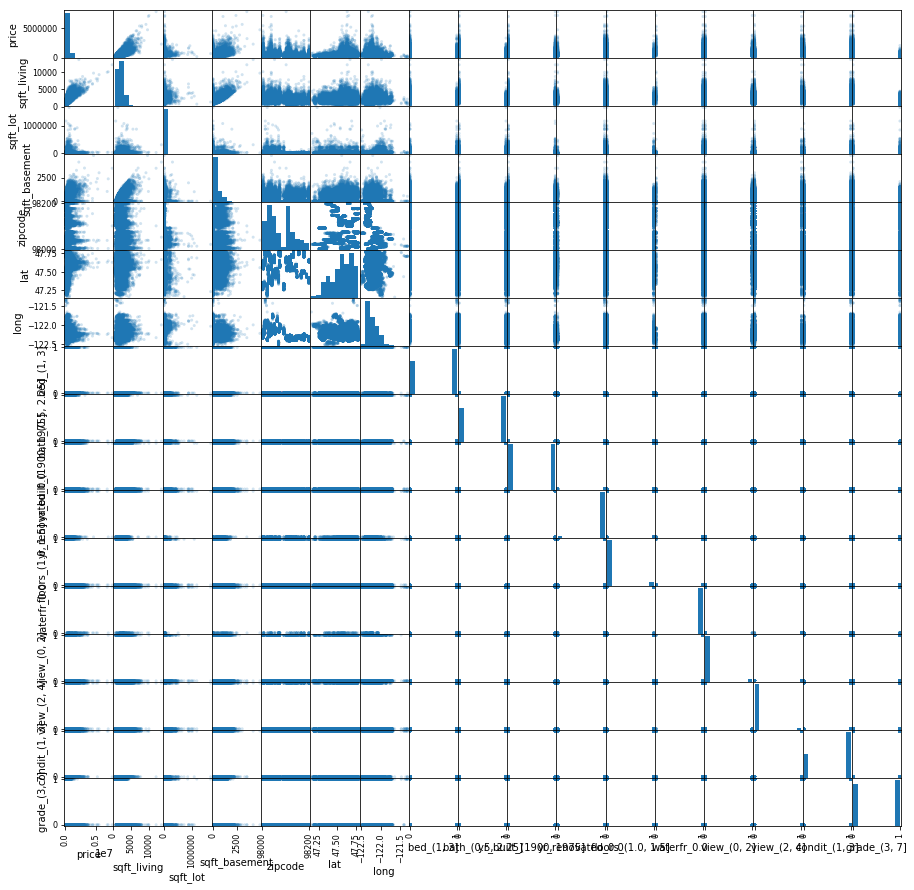

In [82]:
pd.plotting.scatter_matrix(df_new, figsize=(15,15), diagonal='hist', alpha=0.2)
plt.show()

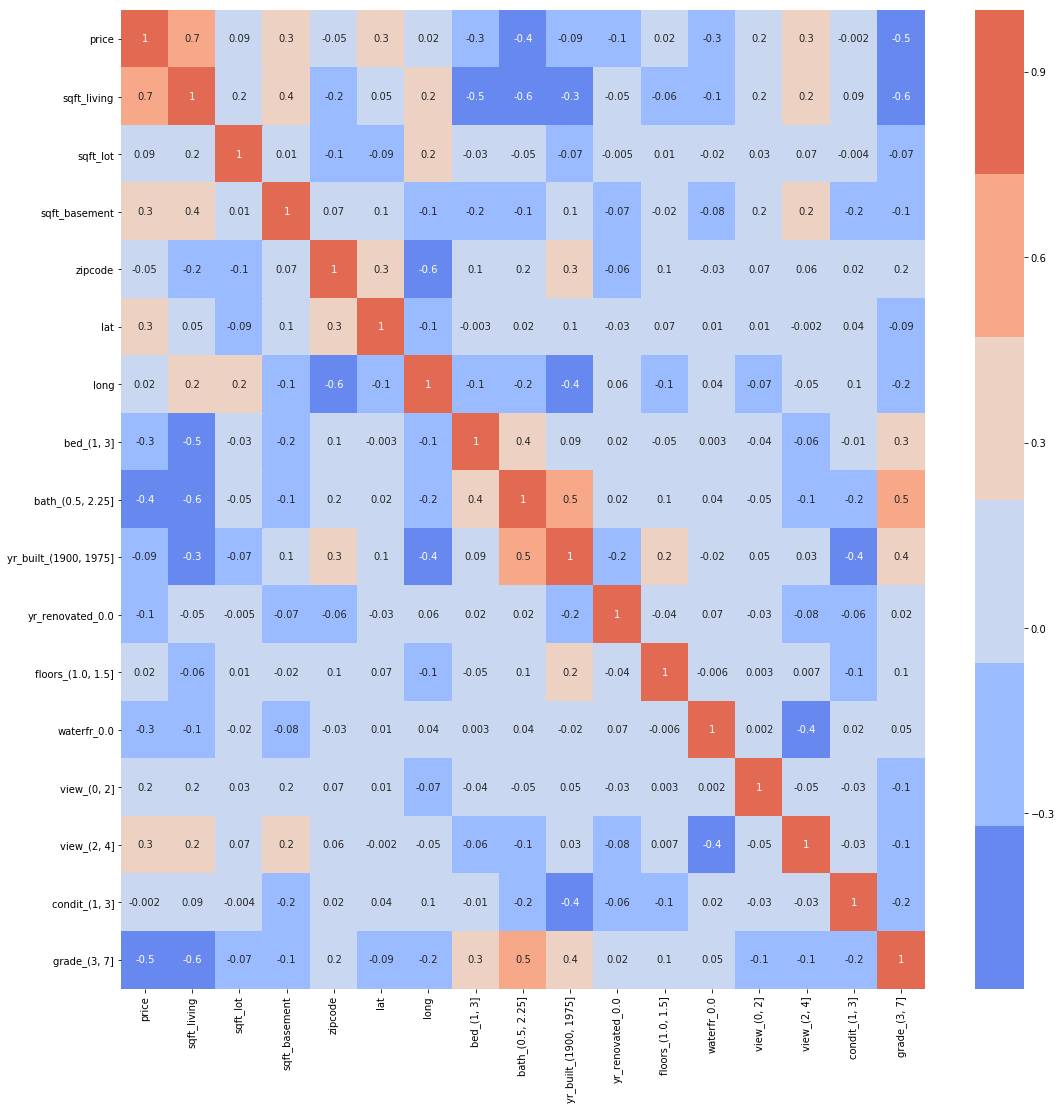

In [83]:
corr = df_new.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

# 3. Build Model

### 3.1 Create a Linear Regression model in statsmodel 

* Anything higher than abs(0.75) has a high correlation 

In [84]:
#Split x and y data
y= df_new['price']
x= df_new.drop(['price', 'date'], axis=1)

In [85]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 16 columns):
sqft_living              21420 non-null int64
sqft_lot                 21420 non-null int64
sqft_basement            21420 non-null float64
zipcode                  21420 non-null int64
lat                      21420 non-null float64
long                     21420 non-null float64
bed_(1, 3]               21420 non-null uint8
bath_(0.5, 2.25]         21420 non-null uint8
yr_built_(1900, 1975]    21420 non-null uint8
yr_renovated_0.0         21420 non-null uint8
floors_(1.0, 1.5]        21420 non-null uint8
waterfr_0.0              21420 non-null uint8
view_(0, 2]              21420 non-null uint8
view_(2, 4]              21420 non-null uint8
condit_(1, 3]            21420 non-null uint8
grade_(3, 7]             21420 non-null uint8
dtypes: float64(3), int64(3), uint8(10)
memory usage: 1.3 MB


In [86]:
X=sm.add_constant(x)

In [87]:
linreg = sm.OLS(y,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2561.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):               0.00
Time:                        05:52:15   Log-Likelihood:            -2.9345e+05
No. Observations:               21420   AIC:                         5.869e+05
Df Residuals:                   21403   BIC:                         5.871e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.346e+07   2.97e+06     -4.541      0.000   -1.93e+07   -7.65e+06
sqft_living             287.1180      2.722    105.486      0.000     281.783     292.453
sqft_lot                 -0.0532      0.037     -1.431      0.152      -0.126       0.020
sqft_basement           -69.4135      4.112    -16.880      0.000     -77.474     -61.353
zipcode                -588.9500     35.172    -16.745      0.000    -657.891    -520.010
lat                    7.163e+05   1.13e+04     63.216      0.000    6.94e+05    7.38e+05
long                  -3.094e+05   1.37e+04    -22.604      0.000   -3.36e+05   -2.83e+05
bed_(1, 3]             5.832e+04   3576.164     16.307      0.000    5.13e+04    6.53e+04
bath_(0.5, 2.25]       2.083e+04   4152.343      5.018      0.000    1.27e+04     2.9e+04
yr_built_(1900, 1975]  4.932e+04   4148.833     11.888      0.000    4.12e+04    5.75e+04
yr_renovated_0.0      -9.274e+04   8350.351    -11.106      0.000   -1.09e+05   -7.64e+04
floors_(1.0, 1.5]      2.238e+04   5437.642      4.115      0.000    1.17e+04     3.3e+04
waterfr_0.0           -6.306e+05   1.95e+04    -32.358      0.000   -6.69e+05   -5.92e+05
view_(0, 2]            1.112e+05   6438.815     17.271      0.000    9.86e+04    1.24e+05
view_(2, 4]            2.409e+05   8750.481     27.527      0.000    2.24e+05    2.58e+05
condit_(1, 3]         -3.929e+04   3471.682    -11.317      0.000   -4.61e+04   -3.25e+04
grade_(3, 7]          -5.994e+04   3899.125    -15.374      0.000   -6.76e+04   -5.23e+04
==============================================================================
Omnibus:                    15722.514   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           949173.182
Skew:                           2.955   Prob(JB):                         0.00
Kurtosis:                      35.071   Cond. No.                     2.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
#Keep in mind that values above have not been normalized/standardized...
#From looking at the p-values from the model above, I can get rid of variable 'sqft_lot'
#Will drop the variable and see what happens



# Step 3: Check if predictors meet assumptions for Linear Regression
        
        -Using histograms, scatter plots, 
        -Transform data (log-transformation, standardization, scale)
        
# Step 4: Split training data

# Step 5: Transform data